<a href="https://colab.research.google.com/github/estelacruz/Data-Alchemist/blob/main/PartOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 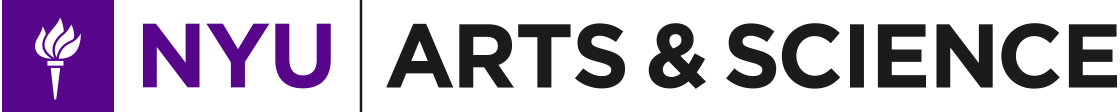



---



**Data Management & Analysis**


**Estela Bobadilla-Cruz**


---










**Task 1:** Write a function called "factors" that returns a set of all the factors of an integer passed to it, other than the number itself and one. 



In [ ]:
def factors(num) :
  # set to store all factors 
  numfactors = set();
  # iterate through number starting from index 1 to last index (exuslive)
  for x in range(2,num):
    # check divisibility 
    if num%x == 0: # is a factor
      # add to set
      numfactors.add(x)
  return numfactors;

#Test Case: 15, 100, 7, 9 
print(factors(15))
print(factors(100))
# print(factors(7)) # returns empty set as it does not have any factors
print(factors(9))

{3, 5}
{2, 4, 5, 10, 50, 20, 25}
{3}




---


**Task 2:** Write another function called "factors2" which takes an arbitrary number of
integer arguments and uses the function factors you just wrote to construct and return a set of all the factors of its arguments. 

In [ ]:
def factors2(* numArguments) :

  # set to store all factors 
  numfactors = set();
  # iterate through number starting from index 1 to last index (exuslive)
  for x in numArguments:
    #send this argument to factor function, store temp array with this nums factors
    tempSet = factors(x)
    # union of both sets
    numfactors = numfactors.union(tempSet)
  return numfactors;


#Test Case: 5,6,7,8
print(factors2(5,6,7,8))
#Test Case: 2,15,30  
print(factors2(2,15,30))

{2, 3, 4}
{2, 3, 5, 6, 10, 15}




---





---


**Task 3:** Read data from two csv (comma-delimited) files on Github. One file contains data on four actual Starbucks stores (Store_Number,Address, City, State,Zip) and the other file contains information on six hypothetical workers at those stores. We can link both files as each worker has a Store_Number that indicates what store they work at.


https://raw.githubusercontent.com/mzeidenberg/0479data/main/StarbucksExample/four_starbacks_stores.csv


https://raw.githubusercontent.com/mzeidenberg/0479data/main/StarbucksExample/starbucks_workers.csv

> **My Task:** Read each file into a list of dictionaries in the following format: each key is the column name, and the values are the values found in each record for those columns

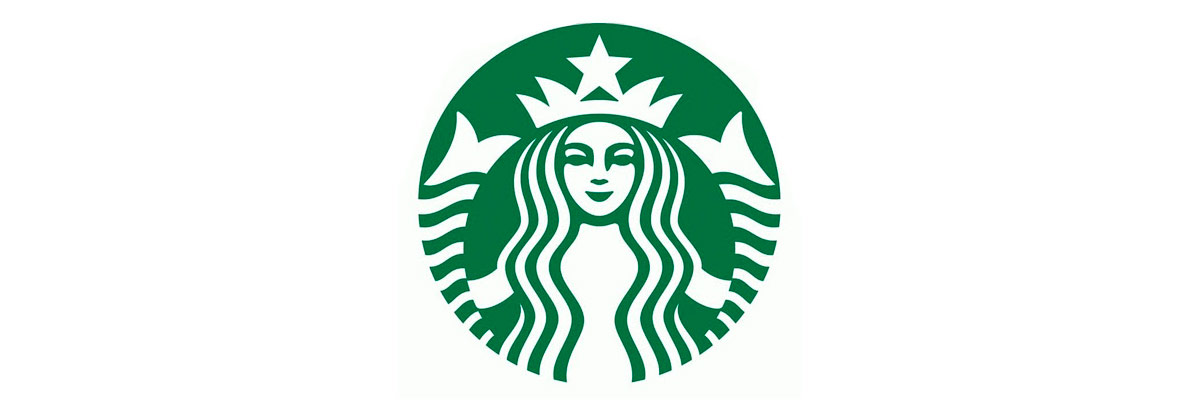

In [ ]:
import urllib
url="https://raw.githubusercontent.com/mzeidenberg/0479data/main/StarbucksExample/four_starbacks_stores.csv"
f = urllib.request.urlopen(url)
#the following code will read all the lines in the first file into a list of
#strings, one string for each line including the header:
lines = f.read().decode('utf-8-sig').split("\r\n")
#print(lines)


# create list of dictionaries 
starbucksStoreInfo = []
# first string tells us about the key values for dictionary
columnValues = lines[0].split(",")


# plan: for each store, populate dictionary using our column values to set keys 
# at this same index, get key value from our store string 

for x in range(1, len(lines)): #exlusive end so all stores are reached
  
  storedict = {}
  storeValues = lines[x].split(",")

  for y in range(0, len(columnValues)):
    # key : value 
    storedict[columnValues[y]] = storeValues[y]
  # append this dict with all nec information to our list of dict
  starbucksStoreInfo.append(storedict)

print(starbucksStoreInfo)

[{'Store_Number': '1', 'Address': '166 7th Ave', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11215'}, {'Store_Number': '2', 'Address': '341 Eastern Parkway', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11238'}, {'Store_Number': '3', 'Address': '100 William St', 'City': 'New York', 'State': 'NY', 'Zip': '10038'}, {'Store_Number': '4', 'Address': '3 Path Plaza', 'City': 'Jersey City', 'State': 'NJ', 'Zip': '07306'}]


**Task Continued**
>  second file should be read in a similar format but using its own headers for the dictionary keys.

In [ ]:
secondurl= "https://raw.githubusercontent.com/mzeidenberg/0479data/main/StarbucksExample/starbucks_workers.csv"
g = urllib.request.urlopen(secondurl)
#the following code will read all the lines in the first file into a list of
#strings, one string for each line including the header:
secondlines = g.read().decode('utf-8-sig').split("\r\n")
#print(secondlines)

# create list of dictionaries 
employeeInfo = []
# first string tells us about the key values for dictionary
colValues = secondlines[0].split(",")


# plan: for each employee, populate dictionary using our column values to set keys 
# at this same index, get key value from our employee string 

for z in range(1, len(secondlines)): #exlusive end so all stores are reached
  
  storedict = {}
  storeValues = secondlines[z].split(",")

  for b in range(0, len(colValues)):
    # key : value 
    storedict[colValues[b]] = storeValues[b]
  # append this dict with all nec information to our list of dict
  employeeInfo.append(storedict)

print(employeeInfo)


[{'Employee_Number': '1', 'Store_Number': '1', 'Name': 'John Liu', 'Hourly_Pay': '15.75', 'Weekly_Hours': '40'}, {'Employee_Number': '2', 'Store_Number': '1', 'Name': 'Ann Leonard', 'Hourly_Pay': '16', 'Weekly_Hours': '30'}, {'Employee_Number': '3', 'Store_Number': '2', 'Name': 'Amy Howard', 'Hourly_Pay': '17', 'Weekly_Hours': '25'}, {'Employee_Number': '4', 'Store_Number': '3', 'Name': 'Jason Horowitz', 'Hourly_Pay': '15.25', 'Weekly_Hours': '20'}, {'Employee_Number': '5', 'Store_Number': '4', 'Name': 'Cleo Collins', 'Hourly_Pay': '18', 'Weekly_Hours': '40'}, {'Employee_Number': '6', 'Store_Number': '4', 'Name': 'Rajiv Patel', 'Hourly_Pay': '17', 'Weekly_Hours': '30'}]




---
**Task 4** : Use the two lists of dictionaries you created above to create a list of dictionaries which contains the store information merged with the employee information for each employee.


In [ ]:
# create another list of dict 
mergedData = []

# iterate through every store
for ii in starbucksStoreInfo:
  #ii is store dict
  for y in employeeInfo:
    # if this employee works at this starburcks, merge both dictionaries 
    # store copy 
    empDict = ii.copy()
    if y['Store_Number'] == empDict['Store_Number']:
      #print(empDict['Store_Number'])
      #print(x)
      #print(y)
      # found employee of this store so create merged dictionary
      empDict.update(y)
        
      # add to our list
      mergedData.append(empDict)


print(mergedData)
print(starbucksStoreInfo)


[{'Store_Number': '1', 'Address': '166 7th Ave', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11215', 'Employee_Number': '1', 'Name': 'John Liu', 'Hourly_Pay': '15.75', 'Weekly_Hours': '40'}, {'Store_Number': '1', 'Address': '166 7th Ave', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11215', 'Employee_Number': '2', 'Name': 'Ann Leonard', 'Hourly_Pay': '16', 'Weekly_Hours': '30'}, {'Store_Number': '2', 'Address': '341 Eastern Parkway', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11238', 'Employee_Number': '3', 'Name': 'Amy Howard', 'Hourly_Pay': '17', 'Weekly_Hours': '25'}, {'Store_Number': '3', 'Address': '100 William St', 'City': 'New York', 'State': 'NY', 'Zip': '10038', 'Employee_Number': '4', 'Name': 'Jason Horowitz', 'Hourly_Pay': '15.25', 'Weekly_Hours': '20'}, {'Store_Number': '4', 'Address': '3 Path Plaza', 'City': 'Jersey City', 'State': 'NJ', 'Zip': '07306', 'Employee_Number': '5', 'Name': 'Cleo Collins', 'Hourly_Pay': '18', 'Weekly_Hours': '40'}, {'Store_Number': '4', 'Address': 

---


**Task 5:** Write the store data as the following nested dictionary: At the top level, the store number is the key and a dictionary containing the other information for the store is the value.


In [ ]:
#print(starbucksStoreInfo)
#print (len(starbucksStoreInfo))
updatedStoreInfo = {}


# iterate through each store 
for x in starbucksStoreInfo:

  updatedStoreInfo[x['Store_Number']] = x
  del updatedStoreInfo[x['Store_Number']]['Store_Number']
  

print(updatedStoreInfo)

{'1': {'Address': '166 7th Ave', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11215'}, '2': {'Address': '341 Eastern Parkway', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11238'}, '3': {'Address': '100 William St', 'City': 'New York', 'State': 'NY', 'Zip': '10038'}, '4': {'Address': '3 Path Plaza', 'City': 'Jersey City', 'State': 'NJ', 'Zip': '07306'}}


---
**Task 6:** . Re-do the merge of problem 4 but using the object you created in problem 5.



In [ ]:
#print(mergedData)

updatedMerge = {}


# iterate through each store 
for x in mergedData:
  #print(x['Name'])
  updatedMerge[x['Name']] = x
  del updatedMerge[x['Name']]['Name']

  

print(updatedMerge)




{'John Liu': {'Store_Number': '1', 'Address': '166 7th Ave', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11215', 'Employee_Number': '1', 'Hourly_Pay': '15.75', 'Weekly_Hours': '40'}, 'Ann Leonard': {'Store_Number': '1', 'Address': '166 7th Ave', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11215', 'Employee_Number': '2', 'Hourly_Pay': '16', 'Weekly_Hours': '30'}, 'Amy Howard': {'Store_Number': '2', 'Address': '341 Eastern Parkway', 'City': 'Brooklyn', 'State': 'NY', 'Zip': '11238', 'Employee_Number': '3', 'Hourly_Pay': '17', 'Weekly_Hours': '25'}, 'Jason Horowitz': {'Store_Number': '3', 'Address': '100 William St', 'City': 'New York', 'State': 'NY', 'Zip': '10038', 'Employee_Number': '4', 'Hourly_Pay': '15.25', 'Weekly_Hours': '20'}, 'Cleo Collins': {'Store_Number': '4', 'Address': '3 Path Plaza', 'City': 'Jersey City', 'State': 'NJ', 'Zip': '07306', 'Employee_Number': '5', 'Hourly_Pay': '18', 'Weekly_Hours': '40'}, 'Rajiv Patel': {'Store_Number': '4', 'Address': '3 Path Plaza', 'City': '

**Task 7:** Using the merged data, find the names just for those employees making at least 16 dollars an hour who work at a store in Brooklyn. 

Output the result as a CSV file with a header line containing the column names (as in the input files) called
"merged_data_select.csv".

In [ ]:
# store names
names = []
for x in updatedMerge.keys():
  #csv file imported as str
  hrpay = float(updatedMerge[x]['Hourly_Pay'])
  #print(float(updatedMerge[x]['Hourly_Pay']))
  if hrpay >= 16: 
    #print(hrpay)
    #check city 
    if updatedMerge[x]['City'] == 'Brooklyn':
      names.append(x)


print(names)

['Ann Leonard', 'Amy Howard']


In [ ]:
import csv

header = ['name']

with open('merged_data_select.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(names)




---


**Task 8:** Encode the four-byte UTF-8 representation for the emoji that looks like a bone as a bytes object, and then encode it into a string object, and print that string object.

In [ ]:
#Encode the four-byte UTF-8 representation 
# 4 byte: f0 9f a6 b4

bytesObj = b'\xf0\x9f\xa6\xb4'
print(bytesObj.decode("utf-8"))

🦴


**Task 9** Bubble sort is a very poor sorting algorithm, but it is relatively easy to implement. Write a function in Python that will sort a list of numbers using bubble sort


In [ ]:

def bubblesort(array):
  # want to keep track if we traversed through whole array without swapping
  # bc this indicates array is sorted
    swap = False
    # starting at the last index, stopping at zero, decreasing by 1 
    for x in range(len(array)-1, 0, -1):
        for i in range(x):
            # if current value is bigger than next, swap
            # we want ascending order
            if array[i] > array[i + 1]:
                swap = True
                # swapping 
                array[i], array[i + 1] = array[i + 1], array[i]       
        if swap == False:
            # array is already sorted
            return
 

test = [5,4,6,7,0,1]
#print(test)
bubblesort(test)
print(test)
 



[0, 1, 4, 5, 6, 7]




---

**Task 10:** Write a function called "interlace" that takes two lists and creates a list consisting of the first element of the first list followed by the first element of the second list followed by the second element of the first list, etc. When you exhaust one of the lists, just append the remainder of the other.

In [ ]:
def interlace (listOne,listTwo):
  lenOne = len(listOne) # 3
  lenTwo = len(listTwo) # 2
  #note total array length
  totallen = lenOne+lenTwo # 5
  #create array
  interlaced = []
  # have counters to keep track of index
  left = 0 # i < 3 goes up to 2
  right = 0 # j < 2 , goes up to 1
  # counter will serve as index
  counter = 0;

  while counter < totallen:
    
    if (left < lenOne) & (right < lenTwo):
      # append from left array first
      interlaced.append(listOne[left])
      counter += 1
      # append from second array
      interlaced.append(listTwo[right])
      counter += 1

      #update indices
      left += 1
      right += 1
    elif (left >= lenOne): #reached end of list one
      # append from list two
      interlaced.append(listTwo[right])
      right += 1
      counter += 1
    elif (right >= lenTwo): #reached end of list two
      # append from list one
      interlaced.append(listOne[left])
      left += 1
      counter += 1
    
    
  return interlaced;

# Test Case:     
one = [1,3,5,6,7]
two = [2,4,9]

print(interlace(one, two))

[1, 2, 3, 4, 5, 9, 6, 7]
